# 超参数和模型参数

- 超参数，算法运行前需要决定的参数
- 模型参数， 算法过程中学习的参数

In [1]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [3]:
X = digits.data
y = digits.target

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
print('best_k= ', best_k)
print('best_score= ', best_score)


best_k=  4
best_score=  0.9916666666666667


# 是否考虑距离


In [10]:
best_method = ""
best_score = 0.0
best_k = -1
for method in ["uniform", 'distance']:
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_method = method
            best_k = k
            best_score = score
print('best_k= ', best_k)
print('best_score= ', best_score)
print('best_method= ', best_method)

best_k=  4
best_score=  0.9916666666666667
best_method=  uniform


# 寻找p

In [12]:
best_p = -1
best_score = 0.0
best_k = -1
for k in range(1, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_method = method
            best_k = k
            best_score = score
            best_p = p
            
print('best_k= ', best_k)
print('best_score= ', best_score)
print('best_p= ', best_p)

best_k=  3
best_score=  0.9888888888888889
best_method=  distance
best_p=  2


# 网格搜索

In [13]:
# 调用GridSearchCV创建网格搜素
from sklearn.model_selection import GridSearchCV

In [14]:
param_gird =[
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1, 11)]
    }, 
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1, 11)],
        'p':[i for i in range(1, 6)]
    }, 
]

In [15]:
knn_clf = KNeighborsClassifier()

In [27]:
%%time
gridSearchCV = GridSearchCV(knn_clf, param_grid=param_gird)

Wall time: 0 ns


In [17]:
gridSearchCV.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
# 返回最好的评估结果 ， 
# 不是用户传入的参数，根据用户传入参数计算出的结果，以 _结尾
gridSearchCV.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance')

In [20]:
gridSearchCV.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [21]:
gridSearchCV.best_score_

0.9853862212943633

In [22]:
# n_jobs多线程并行处理， 占用几个核， -1使用所有核
#verbose  是否打印搜索信息 值越大输出的越来详细

In [28]:
%%time
gridSearchCV = GridSearchCV(knn_clf, param_grid=param_gird, n_jobs=-1, verbose=2)
gridSearchCV.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   36.6s


Wall time: 50.1 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   49.3s finished


# 数据归一化

- 最值归一化

In [31]:
import numpy as np
# 生成一个一维向量进行归一化
x = np.random.randint(0, 100, size = 100)
x

array([34, 58, 27, 67, 71, 75, 16, 58, 89, 26,  8, 76, 59, 15, 34, 38, 31,
       33, 74, 17,  8, 62,  9, 62,  3, 85, 57, 34, 21, 83, 88, 57, 61, 60,
       58, 71, 75, 96, 90, 73,  1, 35, 47, 68, 79, 94, 82, 26, 98, 87, 79,
       96, 59, 99, 80, 43, 51, 53, 71, 34, 61, 72, 64, 67,  7,  1, 24, 80,
       63, 43, 75,  1, 67, 38, 25, 99, 28, 75, 57, 51, 82, 57, 62, 59, 28,
       62, 44, 28, 25, 48, 16, 54, 38,  1, 81,  5, 96, 53, 96, 94])

In [55]:
RES = [(x - np.min(x))/(np.max(x)-np.min(x))]
RES

[array([0.33673469, 0.58163265, 0.26530612, 0.67346939, 0.71428571,
        0.75510204, 0.15306122, 0.58163265, 0.89795918, 0.25510204,
        0.07142857, 0.76530612, 0.59183673, 0.14285714, 0.33673469,
        0.37755102, 0.30612245, 0.32653061, 0.74489796, 0.16326531,
        0.07142857, 0.62244898, 0.08163265, 0.62244898, 0.02040816,
        0.85714286, 0.57142857, 0.33673469, 0.20408163, 0.83673469,
        0.8877551 , 0.57142857, 0.6122449 , 0.60204082, 0.58163265,
        0.71428571, 0.75510204, 0.96938776, 0.90816327, 0.73469388,
        0.        , 0.34693878, 0.46938776, 0.68367347, 0.79591837,
        0.94897959, 0.82653061, 0.25510204, 0.98979592, 0.87755102,
        0.79591837, 0.96938776, 0.59183673, 1.        , 0.80612245,
        0.42857143, 0.51020408, 0.53061224, 0.71428571, 0.33673469,
        0.6122449 , 0.7244898 , 0.64285714, 0.67346939, 0.06122449,
        0.        , 0.23469388, 0.80612245, 0.63265306, 0.42857143,
        0.75510204, 0.        , 0.67346939, 0.37

In [56]:
np.mean(RES)

0.5375510204081632

In [44]:
X = np.random.randint(0, 100, (50, 2))

In [45]:
X[:10,:]

array([[61, 34],
       [94,  8],
       [23, 80],
       [55, 48],
       [66, 29],
       [79, 63],
       [19, 57],
       [63, 97],
       [44,  9],
       [48, 53]])

In [46]:
X = np.array(X, dtype=float)

In [47]:
X[:10,:]

array([[61., 34.],
       [94.,  8.],
       [23., 80.],
       [55., 48.],
       [66., 29.],
       [79., 63.],
       [19., 57.],
       [63., 97.],
       [44.,  9.],
       [48., 53.]])

In [48]:
X[:, 0] = ((X[:, 0]- np.min(X[:, 0]))/(np.max(X[:, 0])-np.min(X[:, 0])))

In [50]:
X[:, 1] = ((X[:, 1]- np.min(X[:, 1]))/(np.max(X[:, 1])-np.min(X[:, 1])))

In [51]:
X[:10, :] 

array([[0.60215054, 0.34343434],
       [0.95698925, 0.08080808],
       [0.19354839, 0.80808081],
       [0.53763441, 0.48484848],
       [0.65591398, 0.29292929],
       [0.79569892, 0.63636364],
       [0.15053763, 0.57575758],
       [0.62365591, 0.97979798],
       [0.41935484, 0.09090909],
       [0.46236559, 0.53535354]])

In [52]:
np.mean(X[:, 0])

0.5481720430107526

In [57]:
np.mean(X[:, 1])

0.5523232323232324

In [58]:
np.std(X[:, 0])

0.29529387703100346

In [59]:
np.std(X[:, 1])

0.30097918626414705

-  均方差归一化

In [60]:
X2 = np.random.randint(0, 100, (50, 2))

In [61]:
X2 = np.array(X, dtype=float)

In [62]:
X2[:,0] = ((X2[:,0]- np.mean(X2[:,0]))/(np.std(X2[:,0])))

In [63]:
X2[:,1] = ((X2[:,1]- np.mean(X2[:,1]))/(np.std(X2[:,1])))

In [64]:
import matplotlib.pyplot as plt

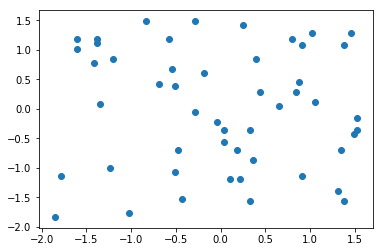

In [65]:
plt.scatter(X2[:,0], X2[:,1] )
plt.show()

In [66]:
np.mean(X2[:,0])

2.0650148258027913e-16

In [67]:
np.std(X2[:,0])

1.0

In [68]:
np.std(X2[:,1])

1.0

In [69]:
np.mean(X2[:,1])

-3.774758283725532e-16

# Scaler

In [152]:
iris = datasets.load_iris()

In [153]:
X = iris.data
y = iris.target

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train,y_test = train_test_split(X, y,test_size = 0.2, random_state=666)

In [156]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

In [157]:
# 存放着均值归一化所对应的信息
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [158]:
# 均值
standardScaler.mean_

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [159]:
standardScaler.scale_

array([0.81019502, 0.44076874, 1.76295187, 0.75429833])

In [160]:
X_train = standardScaler.transform(X_train)
X_train

array([[-0.90616043,  0.94720873, -1.30982967, -1.28485856],
       [-1.15301457, -0.18717298, -1.30982967, -1.28485856],
       [-0.16559799, -0.64092567,  0.22169257,  0.17345038],
       [ 0.45153738,  0.72033239,  0.95909217,  1.49918578],
       [-0.90616043, -1.3215547 , -0.40226093, -0.0916967 ],
       [ 1.43895396,  0.2665797 ,  0.56203085,  0.30602392],
       [ 0.3281103 , -1.09467835,  1.07253826,  0.30602392],
       [ 2.1795164 , -0.18717298,  1.63976872,  1.2340387 ],
       [-0.78273335,  2.30846679, -1.25310662, -1.4174321 ],
       [ 0.45153738, -2.00218372,  0.44858475,  0.43859746],
       [ 1.80923518, -0.41404933,  1.46959958,  0.83631808],
       [ 0.69839152,  0.2665797 ,  0.90236912,  1.49918578],
       [ 0.20468323,  0.72033239,  0.44858475,  0.571171  ],
       [-0.78273335, -0.86780201,  0.10824648,  0.30602392],
       [-0.53587921,  1.40096142, -1.25310662, -1.28485856],
       [-0.65930628,  1.40096142, -1.25310662, -1.28485856],
       [-1.0295875 ,  0.

In [161]:
X_test = standardScaler.transform(X_test)
X_test

array([[-0.28902506, -0.18717298,  0.44858475,  0.43859746],
       [-0.04217092, -0.64092567,  0.78892303,  1.63175932],
       [-1.0295875 , -1.77530738, -0.2320918 , -0.22427024],
       [-0.04217092, -0.86780201,  0.78892303,  0.96889162],
       [-1.52329579,  0.03970336, -1.25310662, -1.28485856],
       [-0.41245214, -1.3215547 ,  0.16496953,  0.17345038],
       [-0.16559799, -0.64092567,  0.44858475,  0.17345038],
       [ 0.82181859, -0.18717298,  0.84564608,  1.10146516],
       [ 0.57496445, -1.77530738,  0.39186171,  0.17345038],
       [-0.41245214, -1.09467835,  0.39186171,  0.04087684],
       [ 1.06867274,  0.03970336,  0.39186171,  0.30602392],
       [-1.64672287, -1.77530738, -1.36655271, -1.15228502],
       [-1.27644165,  0.03970336, -1.19638358, -1.28485856],
       [-0.53587921,  0.72033239, -1.25310662, -1.01971148],
       [ 1.68580811,  1.17408507,  1.35615349,  1.76433286],
       [-0.04217092, -0.86780201,  0.22169257, -0.22427024],
       [-1.52329579,  1.

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [164]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [165]:
y_prdict = knn_clf.predict(X_test)

In [166]:
sum(y_prdict==y_test)/len(y_test)

1.0

In [167]:
knn_clf.score(X_test, y_test)

1.0

In [169]:
Z = np.arange(16).reshape(4,-1)

In [173]:
Z.shape

(4, 4)

In [174]:
Z.shape[1]

4